# Deep Neural Nework Problems

## Setup

In [126]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("CIFAR-100-DNN-Optimization"):
    raise ValueError("Please change working directory to 'path/CIFAR-100-DNN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/CIFAR-100-DNN-Optimization


In [133]:
!pip install -r requirements.txt

In [134]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load Data

In [135]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_pre_path = './data/CIFAR-100/'

In [136]:
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
data_train = data_train_dict[b'data']
y_train_valid = np.array(data_train_dict[b'fine_labels'])
data_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'fine_labels'])

In [ ]:
data_train.shape

(50000, 3072)

In [ ]:
X_train_valid = data_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255
X_test = data_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255

In [ ]:
X_train_valid.shape

(50000, 32, 32, 3)

In [ ]:
label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
    'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=5000/50000, stratify=y_train_valid, random_state=42)

In [ ]:
len(X_train)

45000

In [ ]:
len(y_train)

45000

In [ ]:
len(np.unique(y_train))

100

In [ ]:
pd.Series(y_train).value_counts()

93    450
16    450
36    450
72    450
55    450
     ... 
62    450
89    450
9     450
68    450
13    450
Name: count, Length: 100, dtype: int64

## Data Analysis

In [ ]:
len(X_train)

45000

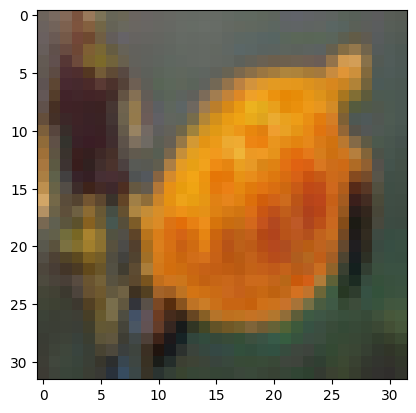

In [ ]:
plt.imshow(X_train[0])
plt.show()

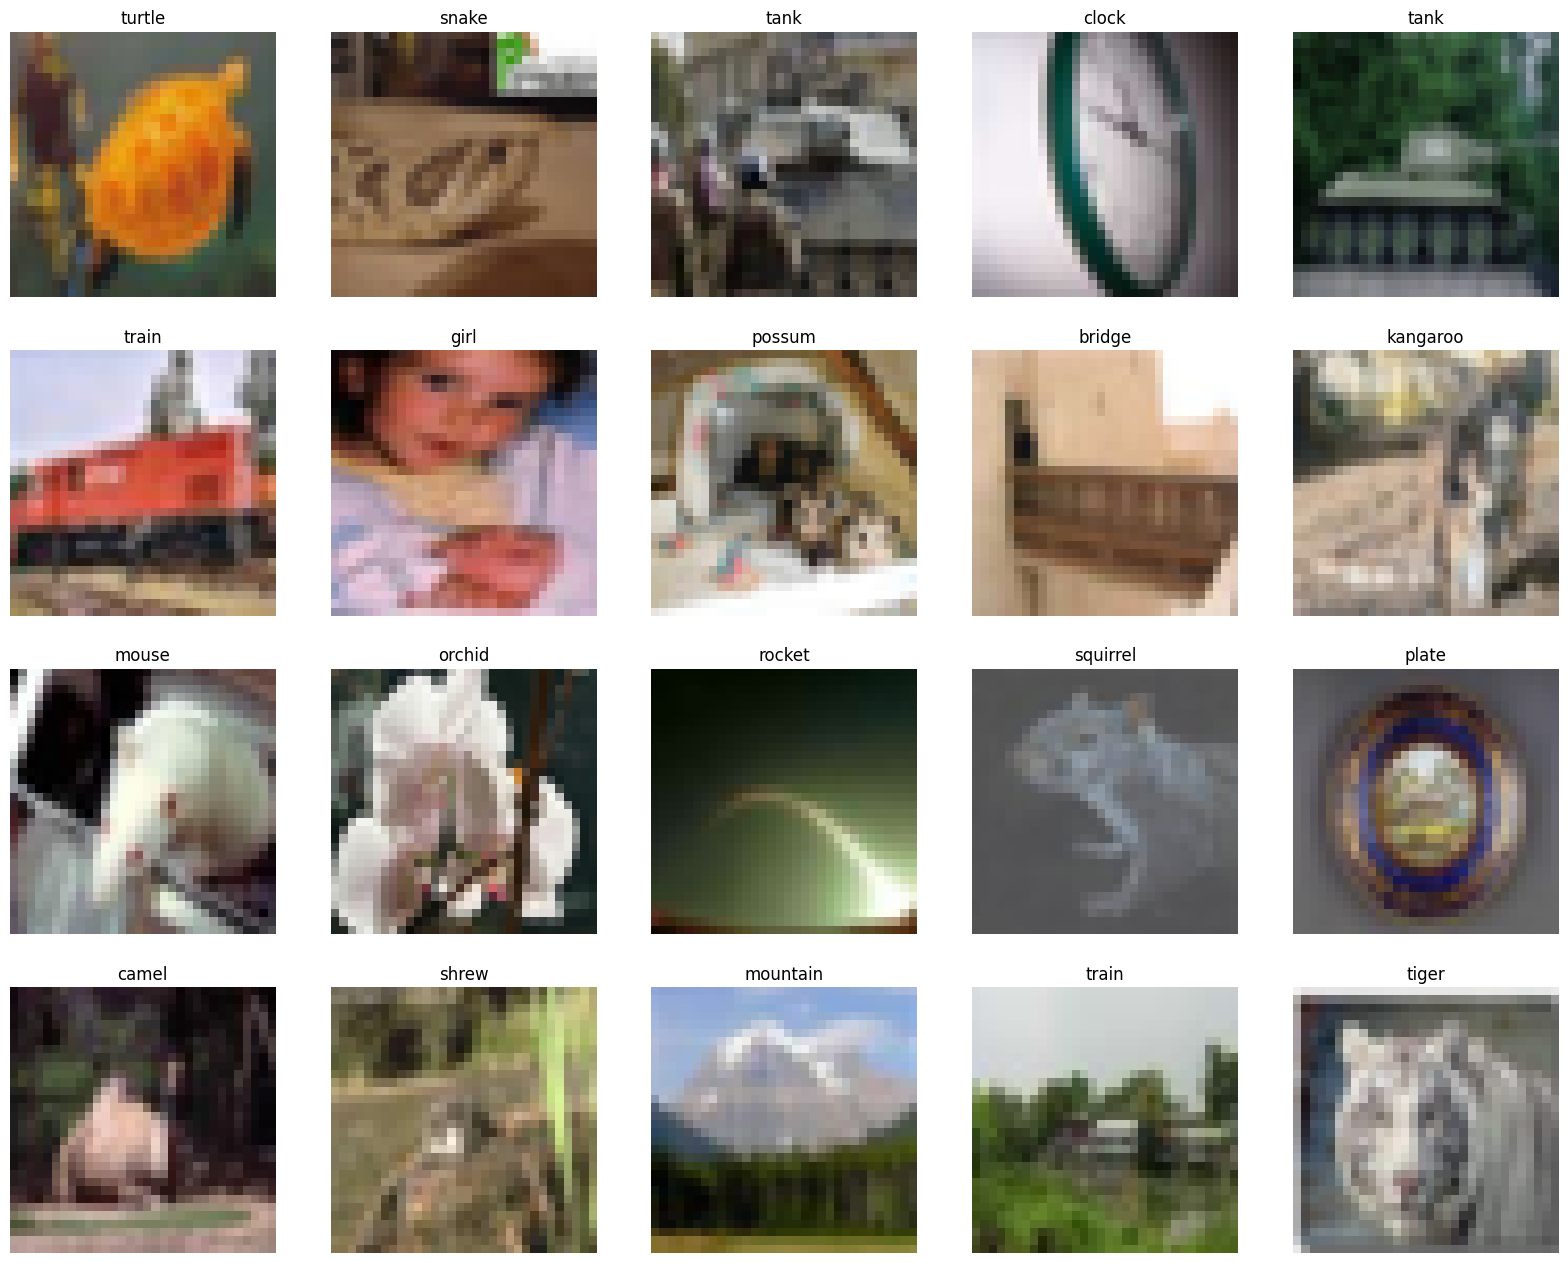

In [ ]:
def plot_images(images, labels, label_names, num_images):
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(label_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_images(X_train, y_train, label_names, num_images=20)